In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette=sns.color_palette("RdBu"))

import sys
sys.path.append('..')

from helper import linear_regression as lr  # my own module
from helper import general as general

In [16]:
# prepare data
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [17]:
X = general.get_X(data)
print(X.shape)

y = general.get_y(data)
print(y.shape)

(100, 3)
(100,)


# sigmoid function

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

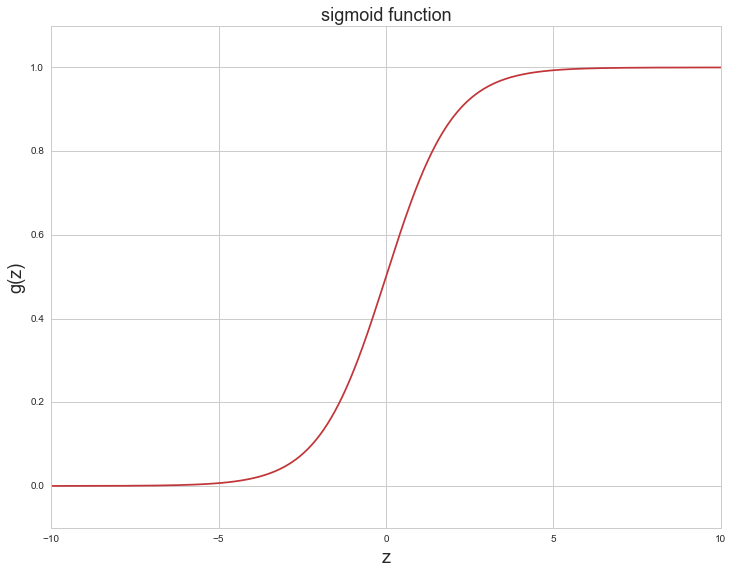

In [13]:
x = np.arange(-10, 10, step=0.01)
y = sigmoid(x)

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(x,y)
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)

# cost function
> maximize $\ell(\theta)$ == minimize $-\ell(\theta)$  
so we should choolse $-\ell(\theta)$ as the cost function


In [14]:
def cost(X, y, theta):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))